In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import fiona
from shapely.ops import unary_union
import networkx as nx
import itertools
import osmnx as ox
import math
import momepy
import matplotlib.pyplot as plt

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


### When all blocks are connected

In [116]:
#lts=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/LTS14_HTC_Shortest_Route1.shp')
#lts.head()

In [117]:
#lts[['GISJOIN','TC']]=lts['Name'].str.split('-',expand=True)
#lts[['b','GISJOIN']]=lts['GISJOIN'].str.split('G',expand=True)
#lts.head()

In [2]:
# Read the block  and population shape file
bp=gpd.read_file("F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/BlocK_level_Population and Race.shp")
bp.head()

,GISJOIN,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,U7B063,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry
0,G41000500201011000,41,005,020101,1000,410050201011000,Block 1000,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061341.280 1178559.751, -2061346.4..."
1,G41000500201011001,41,005,020101,1001,410050201011001,Block 1001,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061403.070 1178577.581, -2061403.3..."
2,G41000500201011002,41,005,020101,1002,410050201011002,Block 1002,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061440.128 1178588.275, -2061442.7..."
3,G41000500201011003,41,005,020101,1003,410050201011003,Block 1003,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061531.715 1178614.589, -2061541.3..."
4,G41000500201011004,41,005,020101,1004,410050201011004,Block 1004,G5040,None,None,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-2061368.947 1178467.541, -2061374.4..."


In [3]:
bp[['b','GISJOIN']]=bp['GISJOIN'].str.split('G',expand=True)
bp.head()

,GISJOIN,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b
0,41000500201011000,41,005,020101,1000,410050201011000,Block 1000,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061341.280 1178559.751, -2061346.4...",
1,41000500201011001,41,005,020101,1001,410050201011001,Block 1001,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061403.070 1178577.581, -2061403.3...",
2,41000500201011002,41,005,020101,1002,410050201011002,Block 1002,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061440.128 1178588.275, -2061442.7...",
3,41000500201011003,41,005,020101,1003,410050201011003,Block 1003,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061531.715 1178614.589, -2061541.3...",
4,41000500201011004,41,005,020101,1004,410050201011004,Block 1004,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061368.947 1178467.541, -2061374.4...",


In [4]:
bp['GISJOIN']=bp['GISJOIN'].astype(str).astype('int64')
#lts['GISJOIN']=lts['GISJOIN'].astype(str).astype('int64')

In [5]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bp["wktcolumn"]= bp.apply(lambda row:row['geometry'].wkt, axis=1)
bp
geometry = bp['wktcolumn'].map(shapely.wkt.loads)
bp1 = bp.drop('wktcolumn', axis=1)
bp2 = gpd.GeoDataFrame(bp1, crs='esri:102003', geometry=geometry)
bp2.head(5)

,GISJOIN,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b
0,41000500201011000,41,005,020101,1000,410050201011000,Block 1000,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061341.280 1178559.751, -2061346.4...",
1,41000500201011001,41,005,020101,1001,410050201011001,Block 1001,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061403.070 1178577.581, -2061403.3...",
2,41000500201011002,41,005,020101,1002,410050201011002,Block 1002,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061440.128 1178588.275, -2061442.7...",
3,41000500201011003,41,005,020101,1003,410050201011003,Block 1003,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061531.715 1178614.589, -2061541.3...",
4,41000500201011004,41,005,020101,1004,410050201011004,Block 1004,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((-2061368.947 1178467.541, -2061374.4...",


In [6]:

# Let's take a copy of our layer
bp_proj = bp2.copy()

# Reproject the geometries by replacing the values with projected ones
bp_proj = bp_proj.to_crs('epsg:2838')
bp_proj.head(5)

,GISJOIN,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b
0,41000500201011000,41,005,020101,1000,410050201011000,Block 1000,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((2328091.033 198620.484, 2328090.167 ...",
1,41000500201011001,41,005,020101,1001,410050201011001,Block 1001,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((2328026.740 198622.233, 2328026.710 ...",
2,41000500201011002,41,005,020101,1002,410050201011002,Block 1002,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((2327988.181 198623.282, 2327987.990 ...",
3,41000500201011003,41,005,020101,1003,410050201011003,Block 1003,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((2327892.913 198625.765, 2327891.473 ...",
4,41000500201011004,41,005,020101,1004,410050201011004,Block 1004,G5040,None,None,...,0,0,0,0,0,0,0,0,"POLYGON ((2328087.399 198524.308, 2328086.717 ...",


In [7]:
bp.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
median_income=pd.read_csv("F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/median_hh_income.csv")
median_income.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,SDELMA,SDSECA,SDUNIA,PUMA5A,BTTRA,BTBGA,NAME_E,AH1PE001,NAME_M,AH1PM001
0,G41000109501001,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9501, Baker County...",40156.0,"Block Group 1, Census Tract 9501, Baker County...",9365.0
1,G41000109501002,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 9501, Baker County...",34000.0,"Block Group 2, Census Tract 9501, Baker County...",13959.0
2,G41000109501003,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 3, Census Tract 9501, Baker County...",62266.0,"Block Group 3, Census Tract 9501, Baker County...",11854.0
3,G41000109502001,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 9502, Baker County...",78558.0,"Block Group 1, Census Tract 9502, Baker County...",26558.0
4,G41000109502002,2013-2017,NaN,NaN,Oregon,41,Baker County,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 9502, Baker County...",43625.0,"Block Group 2, Census Tract 9502, Baker County...",9086.0


In [9]:
#read bg
bg=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/OR_blck_grp_2017.shp")

In [10]:
bg.crs

<Derived Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GISJOIN,Shape_Leng,Shape_Area,geometry
0,41,001,950100,1,410019501001,Block Group 1,G5030,S,2.205986e+09,13837275.0,+44.5468040,-118.1781784,G41000109501001,323465.419044,2.219823e+09,"POLYGON ((-1737359.842 1029170.395, -1737338.7..."
1,41,001,950100,2,410019501002,Block Group 2,G5030,S,1.926901e+08,12317.0,+44.9562277,-118.0519082,G41000109501002,109051.976354,1.927024e+08,"POLYGON ((-1712627.242 1038313.861, -1712879.9..."
2,41,001,950100,3,410019501003,Block Group 3,G5030,S,4.723892e+08,639439.0,+44.8443756,-118.0396603,G41000109501003,140639.998011,4.730286e+08,"POLYGON ((-1712321.712 1019131.259, -1712275.9..."
3,41,001,950200,1,410019502001,Block Group 1,G5030,S,1.469016e+07,0.0,+44.7764594,-117.8821056,G41000109502001,22860.454690,1.469017e+07,"POLYGON ((-1712969.088 1014304.981, -1712991.9..."
4,41,001,950200,2,410019502002,Block Group 2,G5030,S,1.009492e+06,0.0,+44.7753666,-117.8349670,G41000109502002,4878.558266,1.009497e+06,"POLYGON ((-1709338.523 1011818.662, -1709343.2..."


In [12]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:2838')
bg_proj.head(5)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GISJOIN,Shape_Leng,Shape_Area,geometry
0,41,001,950100,1,410019501001,Block Group 1,G5030,S,2.205986e+09,13837275.0,+44.5468040,-118.1781784,G41000109501001,323465.419044,2.219823e+09,"POLYGON ((2679731.350 136865.451, 2679752.280 ..."
1,41,001,950100,2,410019501002,Block Group 2,G5030,S,1.926901e+08,12317.0,+44.9562277,-118.0519082,G41000109501002,109051.976354,1.927024e+08,"POLYGON ((2701277.965 152087.049, 2701093.604 ..."
2,41,001,950100,3,410019501003,Block Group 3,G5030,S,4.723892e+08,639439.0,+44.8443756,-118.0396603,G41000109501003,140639.998011,4.730286e+08,"POLYGON ((2706558.268 133671.514, 2706650.307 ..."
3,41,001,950200,1,410019502001,Block Group 1,G5030,S,1.469016e+07,0.0,+44.7764594,-117.8821056,G41000109502001,22860.454690,1.469017e+07,"POLYGON ((2707186.724 128851.700, 2707187.625 ..."
4,41,001,950200,2,410019502002,Block Group 2,G5030,S,1.009492e+06,0.0,+44.7753666,-117.8349670,G41000109502002,4878.558266,1.009497e+06,"POLYGON ((2711345.513 127396.863, 2711346.377 ..."


In [13]:
bdy=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/SWT_Boundary.shp')

bdy.head()

,FacilityID,Name,FromBreak,ToBreak,Shape_Leng,Shape_Area,geometry
0,1,South Waterfront : 0 - 40,0.0,40.0,0.712661,0.001393,"POLYGON ((-122.67032 45.52688, -122.66920 45.5..."


In [14]:
bdy.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
bdy=bdy.to_crs('epsg:2838')
bdy

,FacilityID,Name,FromBreak,ToBreak,Shape_Leng,Shape_Area,geometry
0,1,South Waterfront : 0 - 40,0.0,40.0,0.712661,0.001393,"POLYGON ((2330488.809 208987.438, 2330575.419 ..."


In [16]:
# now make special join to get total pop
bbtc_bdy=gpd.clip(bg_proj,bdy, keep_geom_type=False)
bbtc_bdy.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GISJOIN,Shape_Leng,Shape_Area,geometry
1868,41,051,006200,1,410510062001,Block Group 1,G5030,S,738057.0,0.0,+45.4676445,-122.6798022,G41005100062001,4429.436472,7.380588e+05,"POLYGON ((2329811.998 203093.667, 2329807.867 ..."
1860,41,051,005900,2,410510059002,Block Group 2,G5030,S,383236.0,0.0,+45.4751184,-122.6741715,G41005100059002,3028.062463,3.832375e+05,"POLYGON ((2330147.574 203734.541, 2330168.576 ..."
1865,41,051,006002,1,410510060021,Block Group 1,G5030,S,1329086.0,0.0,+45.4751394,-122.6869770,G41005100060021,4968.629375,1.329086e+06,"POLYGON ((2329575.430 203836.892, 2329581.675 ..."
1859,41,051,005900,1,410510059001,Block Group 1,G5030,S,1194518.0,703244.0,+45.4955774,-122.6698177,G41005100059001,10491.832094,1.897762e+06,"MULTIPOLYGON (((2330808.468 206023.158, 233066..."
1557,41,051,000100,1,410510001001,Block Group 1,G5030,S,1965307.0,2119299.0,+45.4880680,-122.6678070,G41005100001001,10117.531751,4.084607e+06,"MULTIPOLYGON (((2331134.240 206149.403, 233113..."


<AxesSubplot:>

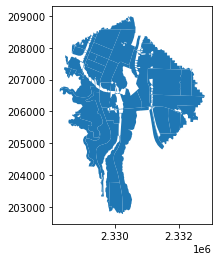

In [17]:
bbtc_bdy.plot()

In [18]:
bg_income=pd.merge(bbtc_bdy,median_income,left_on=['GISJOIN'],right_on=['GISJOIN'],how='left')
bg_income

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,SDELMA,SDSECA,SDUNIA,PUMA5A,BTTRA,BTBGA,NAME_E,AH1PE001,NAME_M,AH1PM001
0,41,051,006200,1,410510062001,Block Group 1,G5030,S,738057.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 62, Multnomah Coun...",97031.0,"Block Group 1, Census Tract 62, Multnomah Coun...",36497.0
1,41,051,005900,2,410510059002,Block Group 2,G5030,S,383236.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 59, Multnomah Coun...",105833.0,"Block Group 2, Census Tract 59, Multnomah Coun...",41136.0
2,41,051,006002,1,410510060021,Block Group 1,G5030,S,1329086.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 60.02, Multnomah C...",100260.0,"Block Group 1, Census Tract 60.02, Multnomah C...",9178.0
3,41,051,005900,1,410510059001,Block Group 1,G5030,S,1194518.0,703244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 59, Multnomah Coun...",93116.0,"Block Group 1, Census Tract 59, Multnomah Coun...",10867.0
4,41,051,000100,1,410510001001,Block Group 1,G5030,S,1965307.0,2119299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 1, Multnomah Count...",144844.0,"Block Group 1, Census Tract 1, Multnomah Count...",37805.0
5,41,051,005900,3,410510059003,Block Group 3,G5030,S,481939.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 3, Census Tract 59, Multnomah Coun...",127434.0,"Block Group 3, Census Tract 59, Multnomah Coun...",36696.0
6,41,051,005900,4,410510059004,Block Group 4,G5030,S,550297.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 4, Census Tract 59, Multnomah Coun...",49000.0,"Block Group 4, Census Tract 59, Multnomah Coun...",10657.0
7,41,051,006001,2,410510060012,Block Group 2,G5030,S,1107738.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 2, Census Tract 60.01, Multnomah C...",152188.0,"Block Group 2, Census Tract 60.01, Multnomah C...",33774.0
8,41,051,001000,4,410510010004,Block Group 4,G5030,S,249171.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 4, Census Tract 10, Multnomah Coun...",64539.0,"Block Group 4, Census Tract 10, Multnomah Coun...",18461.0
9,41,051,006001,1,410510060011,Block Group 1,G5030,S,709974.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"Block Group 1, Census Tract 60.01, Multnomah C...",76563.0,"Block Group 1, Census Tract 60.01, Multnomah C...",18623.0


<AxesSubplot:>

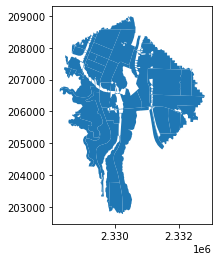

In [19]:
bg_income.plot()

In [20]:
median_income.shape,bbtc_bdy.shape,bg_income.shape

((2634, 40), (43, 16), (43, 55))

In [21]:
pop=gpd.clip(bp_proj,bdy, keep_geom_type=False)
pop.shape

(1069, 143)

## HTC LTS14 Statistics Calculation

In [22]:
lts14=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/SWTC_LTS14_shortest_route.shp')
lts14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry
0,1017,1,1,G41005100010001000 - Location 1,1,2,1072,2832.500111,"LINESTRING (-122.65016 45.49940, -122.65016 45..."
1,1018,1,1,G41005100010001001 - Location 1,2,2,1073,2723.880427,"LINESTRING (-122.65060 45.50014, -122.65077 45..."
2,1019,1,1,G41005100010001002 - Location 1,2,2,1074,2645.007013,"LINESTRING (-122.65155 45.50039, -122.65155 45..."
3,1020,1,1,G41005100010001003 - Location 1,1,2,1075,2589.210239,"LINESTRING (-122.65316 45.50019, -122.65316 45..."
4,1021,1,1,G41005100010001004 - Location 1,2,2,1076,2487.723058,"LINESTRING (-122.65363 45.50097, -122.65374 45..."


In [23]:
lts14['bike_travel_time']=lts14['Total_Leng']*0.000621371/24*60
lts14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time
0,1017,1,1,G41005100010001000 - Location 1,1,2,1072,2832.500111,"LINESTRING (-122.65016 45.49940, -122.65016 45...",4.400084
1,1018,1,1,G41005100010001001 - Location 1,2,2,1073,2723.880427,"LINESTRING (-122.65060 45.50014, -122.65077 45...",4.231351
2,1019,1,1,G41005100010001002 - Location 1,2,2,1074,2645.007013,"LINESTRING (-122.65155 45.50039, -122.65155 45...",4.108827
3,1020,1,1,G41005100010001003 - Location 1,1,2,1075,2589.210239,"LINESTRING (-122.65316 45.50019, -122.65316 45...",4.022150
4,1021,1,1,G41005100010001004 - Location 1,2,2,1076,2487.723058,"LINESTRING (-122.65363 45.50097, -122.65374 45...",3.864497


In [24]:
lts14['bike_travel_time'].describe()

count    1016.000000
mean        5.573040
std         2.156401
min         0.032190
25%         4.073588
50%         4.883205
75%         7.698148
max        10.247957
Name: bike_travel_time, dtype: float64

In [111]:
lts14[['GISJOIN','TC']]=lts14['Name'].str.split('-',expand=True)
lts14[['b','GISJOIN']]=lts14['GISJOIN'].str.split('G',expand=True)
lts14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time,GISJOIN,TC,b
0,1017,1,1,G41005100010001000 - Location 1,1,2,1072,2832.500111,"LINESTRING (-122.65016 45.49940, -122.65016 45...",5.280100,41005100010001000,Location 1,
1,1018,1,1,G41005100010001001 - Location 1,2,2,1073,2723.880427,"LINESTRING (-122.65060 45.50014, -122.65077 45...",5.077621,41005100010001001,Location 1,
2,1019,1,1,G41005100010001002 - Location 1,2,2,1074,2645.007013,"LINESTRING (-122.65155 45.50039, -122.65155 45...",4.930592,41005100010001002,Location 1,
3,1020,1,1,G41005100010001003 - Location 1,1,2,1075,2589.210239,"LINESTRING (-122.65316 45.50019, -122.65316 45...",4.826580,41005100010001003,Location 1,
4,1021,1,1,G41005100010001004 - Location 1,2,2,1076,2487.723058,"LINESTRING (-122.65363 45.50097, -122.65374 45...",4.637397,41005100010001004,Location 1,


In [112]:
lts14.shape

(1016, 13)

In [113]:
lts14['GISJOIN']=lts14['GISJOIN'].astype(str).astype('int64')


In [114]:
lts14.shape,bp.shape

((1016, 13), (15498, 144))

In [115]:
pop14=pd.merge(lts14,bp,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop14.shape

(1016, 156)

In [116]:
pop14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry_x,bike_travel_time,...,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry_y,b_y,wktcolumn
0,1017,1,1,G41005100010001000 - Location 1,1,2,1072,2832.500111,"LINESTRING (-122.65016 45.49940, -122.65016 45...",5.280100,...,0,0,0,0,0,0,0,"POLYGON ((-2055662.771 1184643.867, -2055691.5...",,POLYGON ((-2055662.771400001 1184643.866599999...
1,1018,1,1,G41005100010001001 - Location 1,2,2,1073,2723.880427,"LINESTRING (-122.65060 45.50014, -122.65077 45...",5.077621,...,0,0,0,0,0,0,0,"POLYGON ((-2055729.036 1184690.826, -2055744.7...",,POLYGON ((-2055729.0363999996 1184690.82579999...
2,1019,1,1,G41005100010001002 - Location 1,2,2,1074,2645.007013,"LINESTRING (-122.65155 45.50039, -122.65155 45...",4.930592,...,0,0,0,0,0,0,0,"POLYGON ((-2055797.080 1184737.257, -2055801.2...",,POLYGON ((-2055797.0796000008 1184737.25699999...
3,1020,1,1,G41005100010001003 - Location 1,1,2,1075,2589.210239,"LINESTRING (-122.65316 45.50019, -122.65316 45...",4.826580,...,0,0,0,0,0,0,0,"POLYGON ((-2055897.302 1184830.663, -2055859.6...",,"POLYGON ((-2055897.3016 1184830.6633000001, -2..."
4,1021,1,1,G41005100010001004 - Location 1,2,2,1076,2487.723058,"LINESTRING (-122.65363 45.50097, -122.65374 45...",4.637397,...,0,0,0,0,0,0,0,"POLYGON ((-2055927.779 1184851.355, -2055948.6...",,POLYGON ((-2055927.7792000007 1184851.35539999...


<AxesSubplot:>

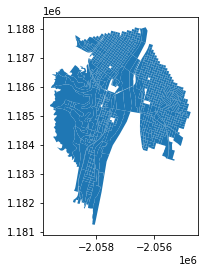

In [117]:
pop14=pop14.rename({'geometry_y':'geometry'},axis='columns')
pop14.plot()

# Calculate the served, unserved Population and income

In [118]:
pct_white14=pop14['U7B003'].sum()/pop14['U7B001'].sum()
pct_white14

0.7330244410981119

In [119]:
pct_baf14=pop14['U7B004'].sum()/pop14['U7B001'].sum()
pct_baf14

0.03553805166222634

In [120]:
# percentage of served population
pct_pop14=pop14['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop14:',pct_pop14)

pct_pop14: 96.10589125885025


In [121]:
pop14.shape

(1016, 156)

In [122]:
bg_income.shape

(43, 55)

In [123]:
pop14.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [124]:
pop14.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry_x,bike_travel_time,...,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b_y,wktcolumn
0,1017,1,1,G41005100010001000 - Location 1,1,2,1072,2832.500111,"LINESTRING (-122.65016 45.49940, -122.65016 45...",5.280100,...,0,0,0,0,0,0,0,"POLYGON ((-2055662.771 1184643.867, -2055691.5...",,POLYGON ((-2055662.771400001 1184643.866599999...
1,1018,1,1,G41005100010001001 - Location 1,2,2,1073,2723.880427,"LINESTRING (-122.65060 45.50014, -122.65077 45...",5.077621,...,0,0,0,0,0,0,0,"POLYGON ((-2055729.036 1184690.826, -2055744.7...",,POLYGON ((-2055729.0363999996 1184690.82579999...
2,1019,1,1,G41005100010001002 - Location 1,2,2,1074,2645.007013,"LINESTRING (-122.65155 45.50039, -122.65155 45...",4.930592,...,0,0,0,0,0,0,0,"POLYGON ((-2055797.080 1184737.257, -2055801.2...",,POLYGON ((-2055797.0796000008 1184737.25699999...
3,1020,1,1,G41005100010001003 - Location 1,1,2,1075,2589.210239,"LINESTRING (-122.65316 45.50019, -122.65316 45...",4.826580,...,0,0,0,0,0,0,0,"POLYGON ((-2055897.302 1184830.663, -2055859.6...",,"POLYGON ((-2055897.3016 1184830.6633000001, -2..."
4,1021,1,1,G41005100010001004 - Location 1,2,2,1076,2487.723058,"LINESTRING (-122.65363 45.50097, -122.65374 45...",4.637397,...,0,0,0,0,0,0,0,"POLYGON ((-2055927.779 1184851.355, -2055948.6...",,POLYGON ((-2055927.7792000007 1184851.35539999...


In [154]:
#pop14=pop14.to_crs('esri:102003',geometry=geometry)
pop14_proj = pop14.to_crs('epsg:2838')
pop14_proj.head(5)

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry_x,bike_travel_time,...,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b_y,wktcolumn
0,1017,1,1,G41005100010001000 - Location 1,1,2,1072,2832.500111,"LINESTRING (-122.65016 45.49940, -122.65016 45...",5.280100,...,0,0,0,0,0,0,0,"POLYGON ((2332060.144 205934.044, 2332056.246 ...",,POLYGON ((-2055662.771400001 1184643.866599999...
1,1018,1,1,G41005100010001001 - Location 1,2,2,1073,2723.880427,"LINESTRING (-122.65060 45.50014, -122.65077 45...",5.077621,...,0,0,0,0,0,0,0,"POLYGON ((2331984.217 205962.857, 2331982.565 ...",,POLYGON ((-2055729.0363999996 1184690.82579999...
2,1019,1,1,G41005100010001002 - Location 1,2,2,1074,2645.007013,"LINESTRING (-122.65155 45.50039, -122.65155 45...",4.930592,...,0,0,0,0,0,0,0,"POLYGON ((2331906.702 205990.712, 2331906.227 ...",,POLYGON ((-2055797.0796000008 1184737.25699999...
3,1020,1,1,G41005100010001003 - Location 1,1,2,1075,2589.210239,"LINESTRING (-122.65316 45.50019, -122.65316 45...",4.826580,...,0,0,0,0,0,0,0,"POLYGON ((2331786.247 206055.954, 2331830.000 ...",,"POLYGON ((-2055897.3016 1184830.6633000001, -2..."
4,1021,1,1,G41005100010001004 - Location 1,2,2,1076,2487.723058,"LINESTRING (-122.65363 45.50097, -122.65374 45...",4.637397,...,0,0,0,0,0,0,0,"POLYGON ((2331751.553 206068.329, 2331748.763 ...",,POLYGON ((-2055927.7792000007 1184851.35539999...


<AxesSubplot:>

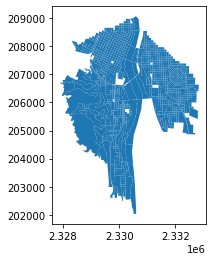

In [156]:
pop14_proj.plot()

In [157]:
pop14_proj.crs

<Derived Projected CRS: EPSG:2838>
Name: NAD83(HARN) / Oregon North
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Oregon - counties of Baker; Benton; Clackamas; Clatsop; Columbia; Gilliam; Grant; Hood River; Jefferson; Lincoln; Linn; Marion; Morrow; Multnomah; Polk; Sherman; Tillamook; Umatilla; Union; Wallowa; Wasco; Washington; Wheeler; Yamhill.
- bounds: (-124.17, 43.95, -116.47, 46.26)
Coordinate Operation:
- name: SPCS83 Oregon North zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [158]:
#bg_income1=bg_income.rename({'geometry_y':'geometry'},axis='columns')
#bg_income1.head()

In [159]:
#bg_income1=bg_income.set_crs('esri:102003', geometry='geometry')

<AxesSubplot:>

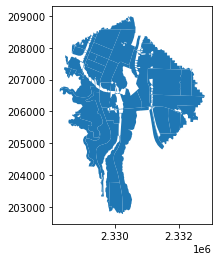

In [160]:
bg_income.geometry.plot()

In [161]:
#bg_income1=gpd.GeoDataFrame(bg_income, geometry='geometry')
#bg_income1.head()

In [162]:
pop14_proj.shape, bg_income1.shape

((1016, 156), (43, 55))

In [163]:
# Portland income
income14=pop14_proj.sjoin(bg_income, how='inner')
income14.shape

(1758, 211)

In [164]:
income14[['AH1PE001']].describe()

,AH1PE001
count,1682.000000
mean,56149.570155
std,34516.210873
min,9720.000000
25%,21518.000000
50%,61250.000000
75%,75500.000000
max,214333.000000


In [180]:
# percentage of served population
pct_pop14=pop14_proj['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop14:',pct_pop14)

pct_pop14: 96.10589125885025


# HTS_LTS13_Statistics

In [25]:
lts13=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/SWFTC_LTS13_shortest_route.shp')
lts13.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry
0,1,1,1,G41005100010001000 - Location 1,1,2,3,3172.887032,"LINESTRING (-122.65016 45.49940, -122.65016 45..."
1,2,1,1,G41005100010001001 - Location 1,1,2,4,3118.113368,"LINESTRING (-122.65067 45.49954, -122.65115 45..."
2,3,1,1,G41005100010001002 - Location 1,1,2,5,3038.640038,"LINESTRING (-122.65169 45.49954, -122.65216 45..."
3,4,1,1,G41005100010001003 - Location 1,2,2,6,2993.000282,"LINESTRING (-122.65316 45.50019, -122.65316 45..."
4,5,1,1,G41005100010001004 - Location 1,1,2,7,2953.364492,"LINESTRING (-122.65372 45.50027, -122.65378 45..."


In [27]:
lts13['bike_travel_time']=lts13['Total_Leng']*0.000621371/20*60
lts13.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time
0,1,1,1,G41005100010001000 - Location 1,1,2,3,3172.887032,"LINESTRING (-122.65016 45.49940, -122.65016 45...",5.914620
1,2,1,1,G41005100010001001 - Location 1,1,2,4,3118.113368,"LINESTRING (-122.65067 45.49954, -122.65115 45...",5.812516
2,3,1,1,G41005100010001002 - Location 1,1,2,5,3038.640038,"LINESTRING (-122.65169 45.49954, -122.65216 45...",5.664368
3,4,1,1,G41005100010001003 - Location 1,2,2,6,2993.000282,"LINESTRING (-122.65316 45.50019, -122.65316 45...",5.579291
4,5,1,1,G41005100010001004 - Location 1,1,2,7,2953.364492,"LINESTRING (-122.65372 45.50027, -122.65378 45...",5.505405


In [28]:
lts13['bike_travel_time'].describe()

count    483.000000
mean       5.348743
std        1.439822
min        0.038628
25%        4.724016
50%        5.629329
75%        6.346875
max        7.478705
Name: bike_travel_time, dtype: float64

In [168]:
lts13[['GISJOIN','TC']]=lts13['Name'].str.split('-',expand=True)
lts13[['b','GISJOIN']]=lts13['GISJOIN'].str.split('G',expand=True)
lts13.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time,GISJOIN,TC,b
0,1,1,1,G41005100010001000 - Location 1,1,2,3,3172.887032,"LINESTRING (-122.65016 45.49940, -122.65016 45...",7.393275,41005100010001000,Location 1,
1,2,1,1,G41005100010001001 - Location 1,1,2,4,3118.113368,"LINESTRING (-122.65067 45.49954, -122.65115 45...",7.265645,41005100010001001,Location 1,
2,3,1,1,G41005100010001002 - Location 1,1,2,5,3038.640038,"LINESTRING (-122.65169 45.49954, -122.65216 45...",7.080460,41005100010001002,Location 1,
3,4,1,1,G41005100010001003 - Location 1,2,2,6,2993.000282,"LINESTRING (-122.65316 45.50019, -122.65316 45...",6.974113,41005100010001003,Location 1,
4,5,1,1,G41005100010001004 - Location 1,1,2,7,2953.364492,"LINESTRING (-122.65372 45.50027, -122.65378 45...",6.881756,41005100010001004,Location 1,


In [169]:
lts13['GISJOIN']=lts13['GISJOIN'].astype(str).astype('int64')

In [170]:
pop13=pd.merge(lts13,bp_proj,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop13.shape

(483, 155)

In [171]:
pct_white13=pop13['U7B003'].sum()/pop13['U7B001'].sum()
pct_baf=pop13['U7B004'].sum()/pop13['U7B001'].sum()
print('pct_baf:',pct_baf)
print('pct_white:',pct_white13)

pct_baf: 0.02406679764243615
pct_white: 0.7638226213864721


<AxesSubplot:>

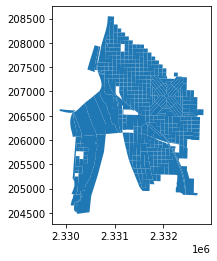

In [173]:
pop13=pop13.rename({'geometry_y':'geometry'},axis='columns')
pop13.plot()

In [174]:
pop13_proj = pop13.to_crs('epsg:2838')
pop13_proj.head(5)

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry_x,bike_travel_time,...,U7B064,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b_y
0,1,1,1,G41005100010001000 - Location 1,1,2,3,3172.887032,"LINESTRING (-122.65016 45.49940, -122.65016 45...",7.393275,...,0,0,0,0,0,0,0,0,"POLYGON ((2332060.144 205934.044, 2332056.246 ...",
1,2,1,1,G41005100010001001 - Location 1,1,2,4,3118.113368,"LINESTRING (-122.65067 45.49954, -122.65115 45...",7.265645,...,0,0,0,0,0,0,0,0,"POLYGON ((2331984.217 205962.857, 2331982.565 ...",
2,3,1,1,G41005100010001002 - Location 1,1,2,5,3038.640038,"LINESTRING (-122.65169 45.49954, -122.65216 45...",7.080460,...,0,0,0,0,0,0,0,0,"POLYGON ((2331906.702 205990.712, 2331906.227 ...",
3,4,1,1,G41005100010001003 - Location 1,2,2,6,2993.000282,"LINESTRING (-122.65316 45.50019, -122.65316 45...",6.974113,...,0,0,0,0,0,0,0,0,"POLYGON ((2331786.247 206055.954, 2331830.000 ...",
4,5,1,1,G41005100010001004 - Location 1,1,2,7,2953.364492,"LINESTRING (-122.65372 45.50027, -122.65378 45...",6.881756,...,0,0,0,0,0,0,0,0,"POLYGON ((2331751.553 206068.329, 2331748.763 ...",


In [176]:
# Portland income
income13=pop13_proj.sjoin(bg_income, how='inner')
income13.shape

(751, 210)

In [177]:
income13[['AH1PE001']].describe()

,AH1PE001
count,751.000000
mean,60922.474035
std,28619.067428
min,9720.000000
25%,45337.000000
50%,65164.000000
75%,75500.000000
max,144844.000000


In [178]:
# percentage of served population
pct_pop13=pop13_proj['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop13:',pct_pop13)

pct_pop13: 31.73175401879147


# HTS_LTS12_Statistics

In [29]:
lts12=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/SWFTC_LTS12_shortest_route.shp')
lts12.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry
0,1,1,1,G41005100010003029 - Location 1,1,2,102,1664.688384,"LINESTRING (-122.66144 45.50415, -122.66178 45..."
1,2,1,1,G41005100010003030 - Location 1,1,2,103,1750.196718,"LINESTRING (-122.66183 45.50304, -122.66184 45..."
2,3,1,1,G41005100011011126 - Location 1,1,2,290,1198.765712,"LINESTRING (-122.66418 45.50646, -122.66421 45..."
3,4,1,1,G41005100011011128 - Location 1,2,2,292,1554.597742,"LINESTRING (-122.66450 45.50858, -122.66430 45..."
4,5,1,1,G41005100011011131 - Location 1,2,2,294,1029.828745,"LINESTRING (-122.66583 45.50554, -122.66596 45..."


In [31]:
lts12['bike_travel_time']=lts12['Total_Leng']*0.000621371/14*60
lts12.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time
0,1,1,1,G41005100010003029 - Location 1,1,2,102,1664.688384,"LINESTRING (-122.66144 45.50415, -122.66178 45...",4.433096
1,2,1,1,G41005100010003030 - Location 1,1,2,103,1750.196718,"LINESTRING (-122.66183 45.50304, -122.66184 45...",4.660806
2,3,1,1,G41005100011011126 - Location 1,1,2,290,1198.765712,"LINESTRING (-122.66418 45.50646, -122.66421 45...",3.192335
3,4,1,1,G41005100011011128 - Location 1,2,2,292,1554.597742,"LINESTRING (-122.66450 45.50858, -122.66430 45...",4.139923
4,5,1,1,G41005100011011131 - Location 1,2,2,294,1029.828745,"LINESTRING (-122.66583 45.50554, -122.66596 45...",2.742453


In [32]:
lts12['bike_travel_time'].describe()

count    27.000000
mean      1.990663
std       1.381383
min       0.055183
25%       1.122239
50%       1.564609
75%       2.967394
max       4.660806
Name: bike_travel_time, dtype: float64

In [184]:
lts12[['GISJOIN','TC']]=lts12['Name'].str.split('-',expand=True)
lts12[['b','GISJOIN']]=lts12['GISJOIN'].str.split('G',expand=True)
lts12.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time,GISJOIN,TC,b
0,1,1,1,G41005100010003029 - Location 1,1,2,102,1664.688384,"LINESTRING (-122.66144 45.50415, -122.66178 45...",4.137556,41005100010003029,Location 1,
1,2,1,1,G41005100010003030 - Location 1,1,2,103,1750.196718,"LINESTRING (-122.66183 45.50304, -122.66184 45...",4.350086,41005100010003030,Location 1,
2,3,1,1,G41005100011011126 - Location 1,1,2,290,1198.765712,"LINESTRING (-122.66418 45.50646, -122.66421 45...",2.979513,41005100011011126,Location 1,
3,4,1,1,G41005100011011128 - Location 1,2,2,292,1554.597742,"LINESTRING (-122.66450 45.50858, -122.66430 45...",3.863928,41005100011011128,Location 1,
4,5,1,1,G41005100011011131 - Location 1,2,2,294,1029.828745,"LINESTRING (-122.66583 45.50554, -122.66596 45...",2.559623,41005100011011131,Location 1,


In [186]:
lts12['GISJOIN']=lts12['GISJOIN'].astype(str).astype('int64')
pop12=pd.merge(lts12,bp,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop12.shape

(27, 156)

In [187]:
pct_white12=pop12['U7B003'].sum()/pop12['U7B001'].sum()
pct_baf12=pop12['U7B004'].sum()/pop12['U7B001'].sum()
print('pct_baf12:',pct_baf12)
print('pct_white12:',pct_white12)

pct_baf12: 0.02938840349483717
pct_white12: 0.7116759332803813


<AxesSubplot:>

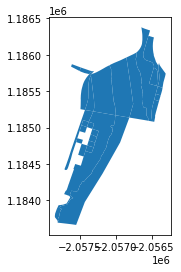

In [188]:
pop12=pop12.rename({'geometry_y':'geometry'},axis='columns')
pop12.plot()

In [189]:
pop12_proj = pop12.to_crs('epsg:2838')
pop12_proj.head(5)

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry_x,bike_travel_time,...,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b_y,wktcolumn
0,1,1,1,G41005100010003029 - Location 1,1,2,102,1664.688384,"LINESTRING (-122.66144 45.50415, -122.66178 45...",4.137556,...,0,0,0,0,0,0,0,"POLYGON ((2331158.114 206524.636, 2331155.662 ...",,POLYGON ((-2056387.6769999992 1185442.10070000...
1,2,1,1,G41005100010003030 - Location 1,1,2,103,1750.196718,"LINESTRING (-122.66183 45.50304, -122.66184 45...",4.350086,...,0,0,0,0,0,0,0,"POLYGON ((2331155.662 206444.657, 2331154.646 ...",,POLYGON ((-2056410.1334000006 1185365.29450000...
2,3,1,1,G41005100011011126 - Location 1,1,2,290,1198.765712,"LINESTRING (-122.66418 45.50646, -122.66421 45...",2.979513,...,0,0,0,0,0,0,0,"POLYGON ((2330793.630 207351.064, 2330790.868 ...",,POLYGON ((-2056533.012599999 1186333.632999999...
3,4,1,1,G41005100011011128 - Location 1,2,2,292,1554.597742,"LINESTRING (-122.66450 45.50858, -122.66430 45...",3.863928,...,0,0,0,0,0,0,0,"POLYGON ((2330868.651 207271.789, 2330869.515 ...",,POLYGON ((-2056480.2905000001 1186238.05419999...
4,5,1,1,G41005100011011131 - Location 1,2,2,294,1029.828745,"LINESTRING (-122.66583 45.50554, -122.66596 45...",2.559623,...,0,0,0,0,0,0,0,"POLYGON ((2331084.418 206145.622, 2331049.556 ...",,POLYGON ((-2056554.1907000002 1185093.70529999...


In [190]:
# Portland income
income12=pop12_proj.sjoin(bg_income, how='inner')
income12.shape

(55, 211)

In [191]:
income12[['AH1PE001']].describe()

,AH1PE001
count,55.000000
mean,72428.890909
std,37090.738215
min,14444.000000
25%,45337.000000
50%,75500.000000
75%,93116.000000
max,144844.000000


In [205]:
# percentage of served population
pct_pop12=pop12_proj['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop12:',pct_pop12)

pct_pop12: 8.409404639978625


## Only LTS1

In [33]:
lts1=gpd.read_file('F:/Paper-5_1 Bicycle Network Connectivity Measures/pybna/Stress Shape File/Travel Time and Population Served/SWFTC_LTS1_shortest_route.shp')
lts1.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry
0,1,1070,1,G41005100011011126 - Location 1,1,2,290,1210.070907,"LINESTRING (-122.66418 45.50646, -122.66421 45..."
1,2,1070,1,G41005100011011128 - Location 1,1,2,292,1838.395609,"LINESTRING (-122.66582 45.50929, -122.66590 45..."
2,3,1070,1,G41005100011011131 - Location 1,2,2,294,1041.133940,"LINESTRING (-122.66583 45.50554, -122.66596 45..."
3,4,1070,1,G41005100011011138 - Location 1,1,2,301,1350.360081,"LINESTRING (-122.66286 45.50667, -122.66318 45..."
4,5,1070,1,G41005100011022057 - Location 1,1,2,404,1412.033615,"LINESTRING (-122.66207 45.50666, -122.66217 45..."


In [34]:
lts1['bike_travel_time']=lts1['Total_Leng']*0.000621371/10*60
lts1.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time
0,1,1070,1,G41005100011011126 - Location 1,1,2,290,1210.070907,"LINESTRING (-122.66418 45.50646, -122.66421 45...",4.511418
1,2,1070,1,G41005100011011128 - Location 1,1,2,292,1838.395609,"LINESTRING (-122.66582 45.50929, -122.66590 45...",6.853954
2,3,1070,1,G41005100011011131 - Location 1,2,2,294,1041.133940,"LINESTRING (-122.66583 45.50554, -122.66596 45...",3.881583
3,4,1070,1,G41005100011011138 - Location 1,1,2,301,1350.360081,"LINESTRING (-122.66286 45.50667, -122.66318 45...",5.034448
4,5,1070,1,G41005100011022057 - Location 1,1,2,404,1412.033615,"LINESTRING (-122.66207 45.50666, -122.66217 45...",5.264380


In [35]:
lts1['bike_travel_time'].describe()

count    21.000000
mean      2.611553
std       1.901577
min       0.077256
25%       1.467062
50%       2.139759
75%       3.881583
max       6.853954
Name: bike_travel_time, dtype: float64

In [196]:
lts1[['GISJOIN','TC']]=lts1['Name'].str.split('-',expand=True)
lts1[['b','GISJOIN']]=lts1['GISJOIN'].str.split('G',expand=True)
lts1.head()

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry,bike_travel_time,GISJOIN,TC,b
0,1,1070,1,G41005100011011126 - Location 1,1,2,290,1210.070907,"LINESTRING (-122.66418 45.50646, -122.66421 45...",3.759515,41005100011011126,Location 1,
1,2,1070,1,G41005100011011128 - Location 1,1,2,292,1838.395609,"LINESTRING (-122.66582 45.50929, -122.66590 45...",5.711629,41005100011011128,Location 1,
2,3,1070,1,G41005100011011131 - Location 1,2,2,294,1041.133940,"LINESTRING (-122.66583 45.50554, -122.66596 45...",3.234652,41005100011011131,Location 1,
3,4,1070,1,G41005100011011138 - Location 1,1,2,301,1350.360081,"LINESTRING (-122.66286 45.50667, -122.66318 45...",4.195373,41005100011011138,Location 1,
4,5,1070,1,G41005100011022057 - Location 1,1,2,404,1412.033615,"LINESTRING (-122.66207 45.50666, -122.66217 45...",4.386984,41005100011022057,Location 1,


In [197]:
lts1['GISJOIN']=lts1['GISJOIN'].astype(str).astype('int64')
pop1=pd.merge(lts1,bp,left_on=['GISJOIN'],right_on=['GISJOIN'],how='inner')
pop1.shape

(21, 156)

In [198]:
pct_white1=pop1['U7B003'].sum()/pop1['U7B001'].sum()
pct_baf1=pop1['U7B004'].sum()/pop1['U7B001'].sum()
print('pct_baf1:',pct_baf1)
print('pct_white1:',pct_white1)

pct_baf1: 0.02938840349483717
pct_white1: 0.7116759332803813


<AxesSubplot:>

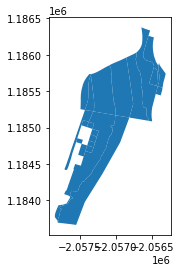

In [199]:
pop1=pop1.rename({'geometry_y':'geometry'},axis='columns')
pop1.plot()

In [200]:
pop1_proj = pop1.to_crs('epsg:2838')
pop1_proj.head(5)

,ObjectID,FacilityID,FacilityRa,Name,IncidentCu,FacilityCu,IncidentID,Total_Leng,geometry_x,bike_travel_time,...,U7B065,U7B066,U7B067,U7B068,U7B069,U7B070,U7B071,geometry,b_y,wktcolumn
0,1,1070,1,G41005100011011126 - Location 1,1,2,290,1210.070907,"LINESTRING (-122.66418 45.50646, -122.66421 45...",3.759515,...,0,0,0,0,0,0,0,"POLYGON ((2330793.630 207351.064, 2330790.868 ...",,POLYGON ((-2056533.012599999 1186333.632999999...
1,2,1070,1,G41005100011011128 - Location 1,1,2,292,1838.395609,"LINESTRING (-122.66582 45.50929, -122.66590 45...",5.711629,...,0,0,0,0,0,0,0,"POLYGON ((2330868.651 207271.789, 2330869.515 ...",,POLYGON ((-2056480.2905000001 1186238.05419999...
2,3,1070,1,G41005100011011131 - Location 1,2,2,294,1041.133940,"LINESTRING (-122.66583 45.50554, -122.66596 45...",3.234652,...,0,0,0,0,0,0,0,"POLYGON ((2331084.418 206145.622, 2331049.556 ...",,POLYGON ((-2056554.1907000002 1185093.70529999...
3,4,1070,1,G41005100011011138 - Location 1,1,2,301,1350.360081,"LINESTRING (-122.66286 45.50667, -122.66318 45...",4.195373,...,0,0,0,0,0,0,0,"POLYGON ((2331071.698 206637.230, 2330981.484 ...",,"POLYGON ((-2056443.0604999997 1185572.796, -20..."
4,5,1070,1,G41005100011022057 - Location 1,1,2,404,1412.033615,"LINESTRING (-122.66207 45.50666, -122.66217 45...",4.386984,...,0,0,0,0,0,0,0,"POLYGON ((2331148.765 206832.609, 2331150.987 ...",,"POLYGON ((-2056319.3959 1185742.5770999994, -2..."


In [201]:
# Portland income
income1=pop1_proj.sjoin(bg_income, how='inner')
income1.shape

(44, 211)

In [202]:
income1[['AH1PE001']].describe()

,AH1PE001
count,44.000000
mean,71732.840909
std,38666.475469
min,14444.000000
25%,45337.000000
50%,75500.000000
75%,93116.000000
max,144844.000000


In [204]:
# percentage of served population
pct_pop1=pop1['U7B001'].sum()/pop['U7B001'].sum()*100
print('pct_pop1:',pct_pop1)

pct_pop1: 8.409404639978625
